# Application of jupyter-matplotlib

# Overview
Taken from the matplotlib [readme](https://github.com/matplotlib/ipympl#ipympl)

Leveraging the Jupyter interactive widgets framework, `ipympl` enables the interactive features of matplotlib in the Jupyter notebook and in JupyterLab.

Besides, the figure `canvas` element is a proper Jupyter interactive widget which can be positioned in interactive widget layouts.


# Examples
Everything taken from the matplotlib [examples](https://github.com/matplotlib/ipympl/blob/master/examples/ipympl.ipynb) 

In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl, which is installed by default
# (but can be installed via pip or conda)
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False  # Hide the Figure name at the top of the figure

In [4]:
fig.canvas.footer_visible = False

In [5]:
fig.canvas.resizable = False

In [6]:
# If true then scrolling while the mouse is over the canvas will not move the entire notebook
fig.canvas.capture_scroll = True

You can also call display on fig.canvas to display the interactive plot anywhere in the notebook.  

Both displays are linked (if you change one, both will show those changes)

In [7]:
fig.canvas.toolbar_visible = True
display(fig.canvas)

Canvas(capture_scroll=True, footer_visible=False, header_visible=False, resizable=False, toolbar=Toolbar(tooli…

Or you can display(fig) to embed the current plot as a png

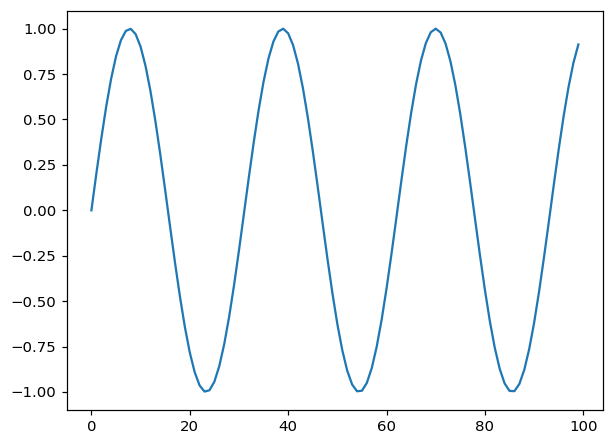

In [8]:
display(fig)

## Subplots

In [9]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# 3D Plotting

In [10]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Changing a Line plot with a slide 

In [11]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…